# Final Project Submission

* **Student name**: Sara Robinson
* **Student pace**: *self paced*/part time/full time
* **Scheduled project review date/time**: Tuesday 2/9/2021 10:30 AM
* **Instructor name**: Jeff Herman
* **Blog post URL**: https://srobz.github.io/module_2_project
* **Notebook**: *2*/3

## Introduction
This is the second notebook for the Module 2 Final Project. It is picking up at Data Exploration.

## Import Libraries
In the following cells I again import the relevant libraries.

### Import Data Cleaning and Visualization Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Statistics Libraries

In [2]:
import scipy.stats as stats
from statsmodels.formula.api import ols

## Load Data
In the previous notebook, we prepared the data and made an updated dataframe. In the following cell we will load this new dataset into the notebook and begin data exploration.

In [3]:
df = pd.read_csv('UpdatedDF.csv') #Creating dataframe for data set
df.head() #Pulling up first 5 rows to inspect

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement
0,0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,98178,47.5112,-122.257,1340,5650,2014,10,0,0
1,1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,98125,47.7210,-122.319,1690,7639,2014,12,1,1
2,2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,98028,47.7379,-122.233,2720,8062,2015,2,2,0
3,3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,98136,47.5208,-122.393,1360,5000,2014,12,1,1
4,4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,98074,47.6168,-122.045,1800,7503,2015,2,2,0


Before we go further, I am going to remove the column **Unnamed:0** as it was added when I saved the previous dataframe.

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1) #Dropping unnamed column

In [5]:
df.head() #Checking to see that the column was dropped

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,2014,10,0,0
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,2014,12,1,1
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2015,2,2,0
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,2014,12,1,1
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2015,2,2,0


# Data Exploration

## Exploratory Data Analysis
In the following cells, I will perform some EDA.

I will start by grabbing the descriptive statistics for this dataset.

In [6]:
df.describe() #Getting descriptive statistics for dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1788.557537,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,2014.322560,6.575555,2.012074,0.384694
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,827.745641,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308,0.467467,3.113740,1.460368,0.486534
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,1.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,2.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,3.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,6.000000,1.000000


The first thing I notice is that bedrooms has an average of 3.37, but a maximum of 33; there is definitely an outlier within bedrooms. While this outlier is easy to see from the descriptive statistics, other outliers are not as easily identifiable.

Before I look further into outliers, I also want to look at the spread of each column, so I will create a histogram for each variable.

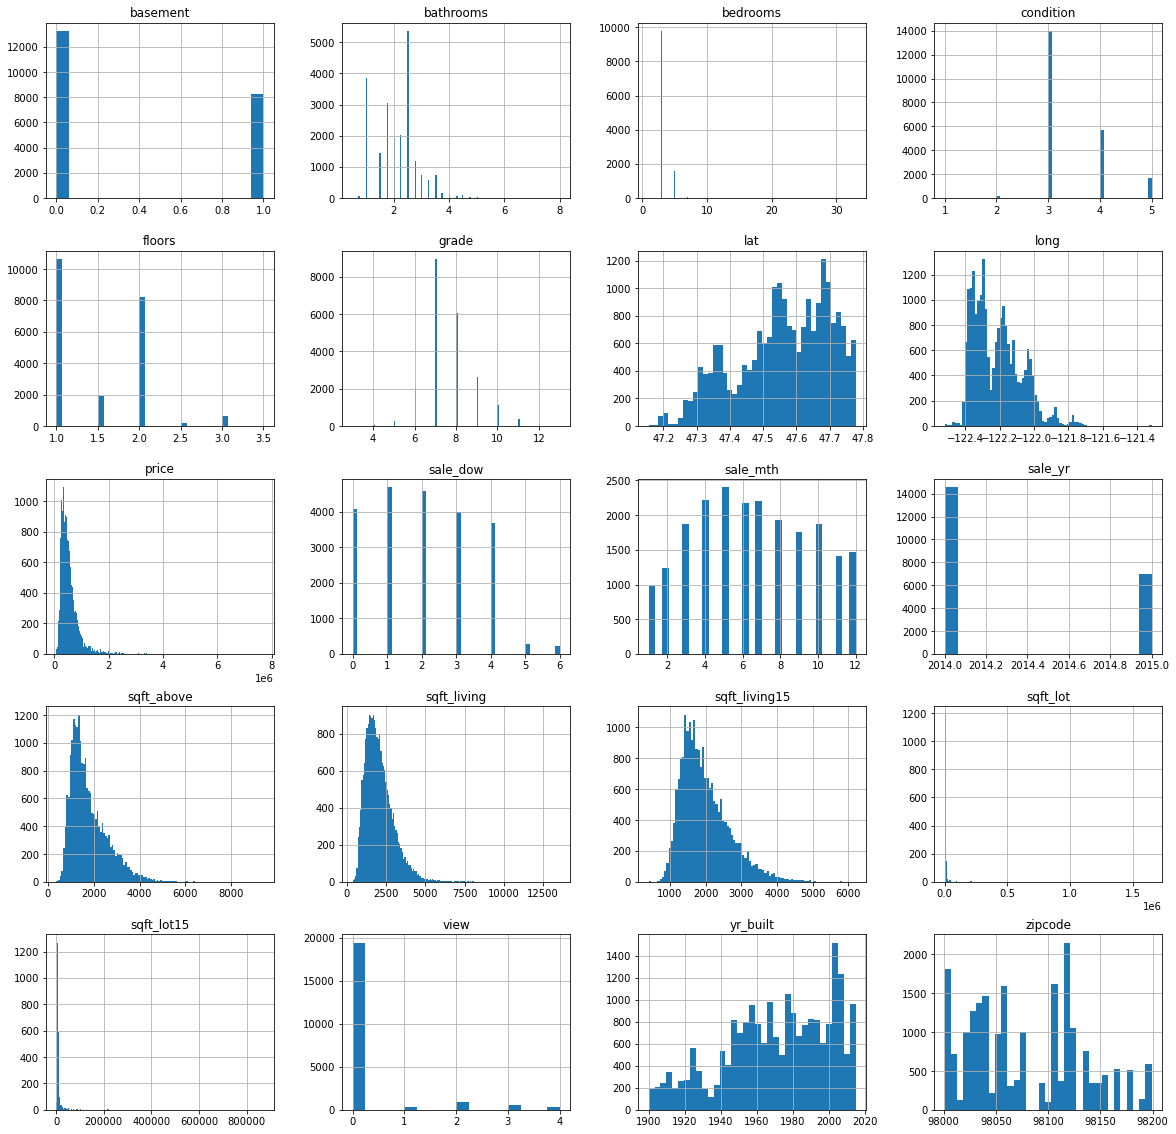

In [7]:
hists = df.hist(figsize = (20, 20), bins = 'auto') #Makes a histogram for each variable

Some observations of the above visualizations:
* Price, sqft_above, sqft_living, and sqft_living15 are all continuous and heavily skewed to the left.
* Most values are bunched towards the lower end while there are a few very large values.
* From the bathrooms feature it looks like most houses have around 2.5 bathrooms.
* From the condition feature it looks like most houses have a 3/5 rating.
* More houses were sold in 2014 than in 2015.

Due to the heavy left skew of price, I am going to cut off higher values to create a more normal distribution, hopefully this will help remove any outliers in other variables as well. I'm going to start by looking closer at the histogram for price. Just before that, I am going to add another price column as 'Price in $100,000" so that when we look at the spread we'll have a better understanding because the numbers are conceptualized.

In [8]:
df['price_in_100000'] = df['price'] / 100000 #Dividing price by 100000
df.head() #Printing the top of the dataframe to make sure the column was added

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,price_in_100000
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,0,0,2.219
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,1,1,5.380
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,2,0,1.800
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,1,1,6.040
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,2,0,5.100


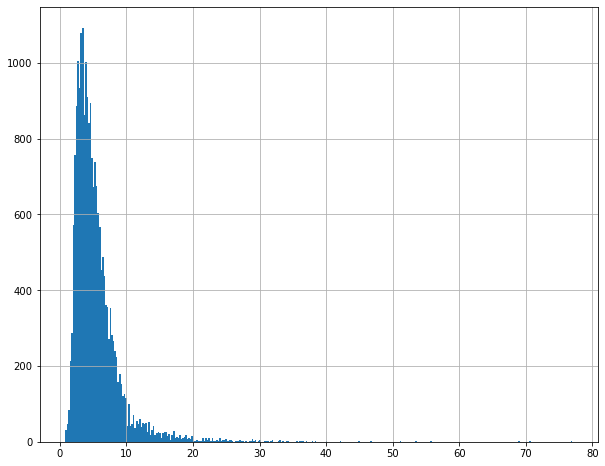

In [9]:
df['price_in_100000'].hist(figsize = (10, 8), bins = 'auto'); #Histogram for price in 100000

In [10]:
df['price_in_100000'].describe() #Descriptive statistics for price in 100000

count    21534.000000
mean         5.400577
std          3.660596
min          0.780000
25%          3.220000
50%          4.500000
75%          6.450000
max         77.000000
Name: price_in_100000, dtype: float64

It is much easier to understand the spread of house prices now. In order to create a more normal distribution, I am going to create a column that calculates the z-score of the house prices, then I will look at that column's descriptive statistics in order to determine a cut-off point. I will also be deleting the 'Price in 100000" column as it was only needed for visualization purposes.

In [11]:
del df['price_in_100000'] #Deleting column we used for visualization

In [12]:
df['price_z'] = stats.zscore(df['price']) #Grabbing z-scores of price
df.head() #Printing first 5 rows of dataframe to check

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,price_z
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,0,0,-0.869162
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,1,1,-0.005621
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,2,0,-0.983627
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,1,1,0.174681
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,2,0,-0.082113


In [13]:
df['price_z'].describe() #Grabbing descriptive statistics for z-score

count    2.153400e+04
mean    -3.691463e-18
std      1.000023e+00
min     -1.262276e+00
25%     -5.957028e-01
50%     -2.460249e-01
75%      2.866877e-01
max      1.955995e+01
Name: price_z, dtype: float64

Because the minimum is -1.26, I am going to remove every entry where the z-score is below -1.26 or above 1.26.

In [14]:
df.drop(df.loc[df['price_z'] >= 1.26].index, inplace = True) #Dropping z scores greater than 1.26
df.head() #Checking the dataframe

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,price_z
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,0,0,-0.869162
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,1,1,-0.005621
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,2,0,-0.983627
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,1,1,0.174681
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,2,0,-0.082113


Now that we've removed any price outliers, let's take another look at the histogram distributions. I will also remove the price z-score column as it is not necessary for further analysis.

In [15]:
del df['price_z'] #Deleting z-score price column

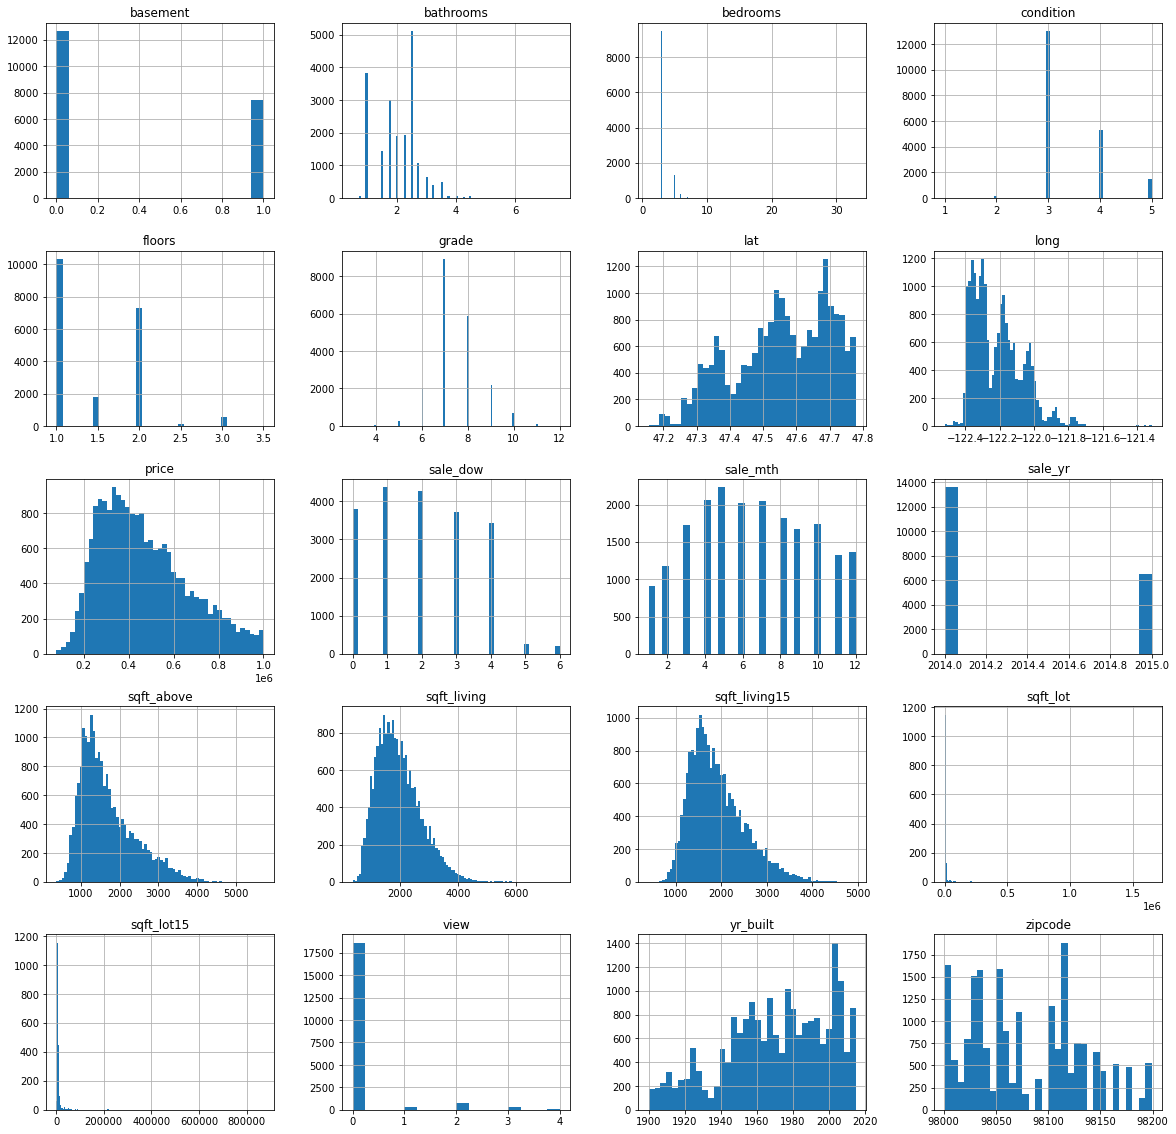

In [16]:
hists = df.hist(figsize = (20, 20), bins = 'auto') #Makes a histogram for each variable

Many of these distributions have become significantly less skewed; there is still a lot of left skewness though. I believe we were able to remove some outliers by removing those outside of the z-score price range. I am going to look at the descriptive statistics again and see if it looks right.

In [17]:
df.describe() #Looking at updated descriptive statistics

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement
count,20082.000000,20082.000000,20082.000000,20082.000000,2.008200e+04,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000,20082.000000
mean,467962.440643,3.322677,2.039501,1955.501394,1.448904e+04,1.471392,0.162285,3.405288,7.505378,1692.883677,1970.730356,98078.583259,47.556038,-122.213292,1908.431332,12362.273280,2014.322229,6.580122,2.010806,0.368788
std,196520.919461,0.907533,0.702562,755.677408,3.991134e+04,0.536424,0.619959,0.645932,1.012740,711.661803,29.118816,53.302965,0.141637,0.142449,600.989987,26375.313441,0.467342,3.117166,1.460580,0.482488
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000
25%,314912.500000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,98033.000000,47.457700,-122.330000,1460.000000,5040.000000,2014.000000,4.000000,1.000000,0.000000
50%,434937.500000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1510.000000,1974.000000,98065.000000,47.565900,-122.233000,1790.000000,7529.000000,2014.000000,6.000000,2.000000,0.000000
75%,594000.000000,4.000000,2.500000,2410.000000,1.026000e+04,2.000000,0.000000,4.000000,8.000000,2080.000000,1996.000000,98118.000000,47.680100,-122.122250,2260.000000,9834.000000,2015.000000,9.000000,3.000000,1.000000
max,1000000.000000,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,4.000000,5.000000,12.000000,5710.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000,2015.000000,12.000000,6.000000,1.000000


I'm going to do something similar to what I did above and look at z-scores for bedrooms, I will then remove data points above or below a certain z-score point to even out those columns. If following this there are still outliers in bathrooms, I will do the same.

In [18]:
df['bed_z'] = stats.zscore(df['bedrooms']) #Grabbing z-scores of bedrooms
df.head() #Printing first 5 rows to check

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,bed_z
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,0,0,-0.355563
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,1,1,-0.355563
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,2,0,-1.457478
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,1,1,0.746352
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,2,0,-0.355563


In [19]:
df['bed_z'].describe() #Checking descriptive statistics of bedroom z scores

count    2.008200e+04
mean    -6.827855e-16
std      1.000025e+00
min     -2.559393e+00
25%     -3.555627e-01
50%     -3.555627e-01
75%      7.463525e-01
max      3.270189e+01
Name: bed_z, dtype: float64

Because the minimum is -2.56, I will remove every entry where the bedrooms z-score is below -2.55 or above 2.55.

In [20]:
df.drop(df.loc[df['bed_z'] >= 2.55].index, inplace = True) #Dropping z scores greater than 2.55
df.describe() #Checking descriptive statistics to see if there are less outliers now

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,bed_z
count,19818.000000,19818.000000,19818.000000,19818.000000,1.981800e+04,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,...,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000,19818.000000
mean,466465.009789,3.281966,2.027437,1942.153245,1.447752e+04,1.470683,0.160914,3.404582,7.503986,1685.408316,...,98078.545918,47.555761,-122.212881,1906.919316,12364.066303,2014.322081,6.581542,2.011908,0.365375,-0.044860
std,195985.469123,0.815849,0.689941,746.348910,4.002073e+04,0.536829,0.617398,0.645457,1.014359,707.029330,...,53.300563,0.141832,0.142856,601.642804,26357.948575,0.467286,3.114027,1.462025,0.481547,0.898996
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000,-2.559393
25%,312500.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1170.000000,...,98033.000000,47.457125,-122.330000,1460.000000,5040.000000,2014.000000,4.000000,1.000000,0.000000,-0.355563
50%,432000.000000,3.000000,2.000000,1830.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1500.000000,...,98065.000000,47.565600,-122.232000,1790.000000,7526.500000,2014.000000,6.000000,2.000000,0.000000,-0.355563
75%,590000.000000,4.000000,2.500000,2390.000000,1.023275e+04,2.000000,0.000000,4.000000,8.000000,2070.000000,...,98118.000000,47.680200,-122.122000,2260.000000,9827.000000,2015.000000,9.000000,3.000000,1.000000,0.746352
max,1000000.000000,5.000000,6.000000,7120.000000,1.651359e+06,3.500000,4.000000,5.000000,12.000000,5710.000000,...,98199.000000,47.777600,-121.315000,4950.000000,871200.000000,2015.000000,12.000000,6.000000,1.000000,1.848268


Perfect, it looks like we were able to remove the heavy outlier that was skewing bedrooms. Next we'll remove the bedroom z-score column, add a bathroom z-score column and remove data points in a similar manner.

In [21]:
del df['bed_z'] #Deleting bedroom z-score column

In [22]:
df['bath_z'] = stats.zscore(df['bathrooms']) #Grabbing z-score of bathrooms
df.head() #Printing first 5 rows to check

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,bath_z
0,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,0,0,-1.489204
1,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,1,1,0.322590
2,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,2,0,-1.489204
3,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,1,1,1.409667
4,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,2,0,-0.039768


In [23]:
df['bath_z'].describe() #Grabbing descriptive statistics

count    1.981800e+04
mean     2.319200e-15
std      1.000025e+00
min     -2.213921e+00
25%     -7.644860e-01
50%     -3.976841e-02
75%      6.849492e-01
max      5.757973e+00
Name: bath_z, dtype: float64

The minimum is -2.21, so I will remove entries with bathroom z-scores above 2.21 or below -2.21.

In [24]:
df.drop(df.loc[df['bath_z'] >= 2.21].index, inplace = True) #Dropping z scores greater than 2.21
df.describe() #Checking descriptive statistics to see if there are less outliers now

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_yr,sale_mth,sale_dow,basement,bath_z
count,19659.000000,19659.000000,19659.000000,19659.000000,1.965900e+04,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,...,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000,19659.000000
mean,464034.259881,3.273920,2.010847,1928.400376,1.430168e+04,1.467165,0.158248,3.405921,7.491531,1674.068417,...,98078.610153,47.555657,-122.213338,1899.802889,12246.373620,2014.322193,6.583193,2.011903,0.364006,-0.024046
std,194173.340088,0.811829,0.666723,727.886311,3.911798e+04,0.536469,0.611247,0.646045,1.002422,692.757304,...,53.321161,0.142023,0.142657,593.580656,25448.584751,0.467328,3.113568,1.461884,0.481163,0.966372
min,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000,0.000000,-2.213921
25%,311000.000000,3.000000,1.500000,1380.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1160.000000,...,98033.000000,47.456500,-122.331000,1460.000000,5040.000000,2014.000000,4.000000,1.000000,0.000000,-0.764486
50%,430000.000000,3.000000,2.000000,1820.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1490.000000,...,98065.000000,47.565500,-122.233000,1780.000000,7519.000000,2014.000000,6.000000,2.000000,0.000000,-0.039768
75%,585000.000000,4.000000,2.500000,2380.000000,1.021500e+04,2.000000,0.000000,4.000000,8.000000,2050.000000,...,98118.000000,47.680300,-122.123000,2250.000000,9805.000000,2015.000000,9.000000,3.000000,1.000000,0.684949
max,1000000.000000,5.000000,3.500000,5470.000000,1.651359e+06,3.500000,4.000000,5.000000,11.000000,5450.000000,...,98199.000000,47.777600,-121.315000,4950.000000,560617.000000,2015.000000,12.000000,6.000000,1.000000,2.134384


Perfect! Now I will remove the z-score column and we'll take another look at the histogram distributions one last time.

In [25]:
del df['bath_z'] #Deleting bathroom z-score column

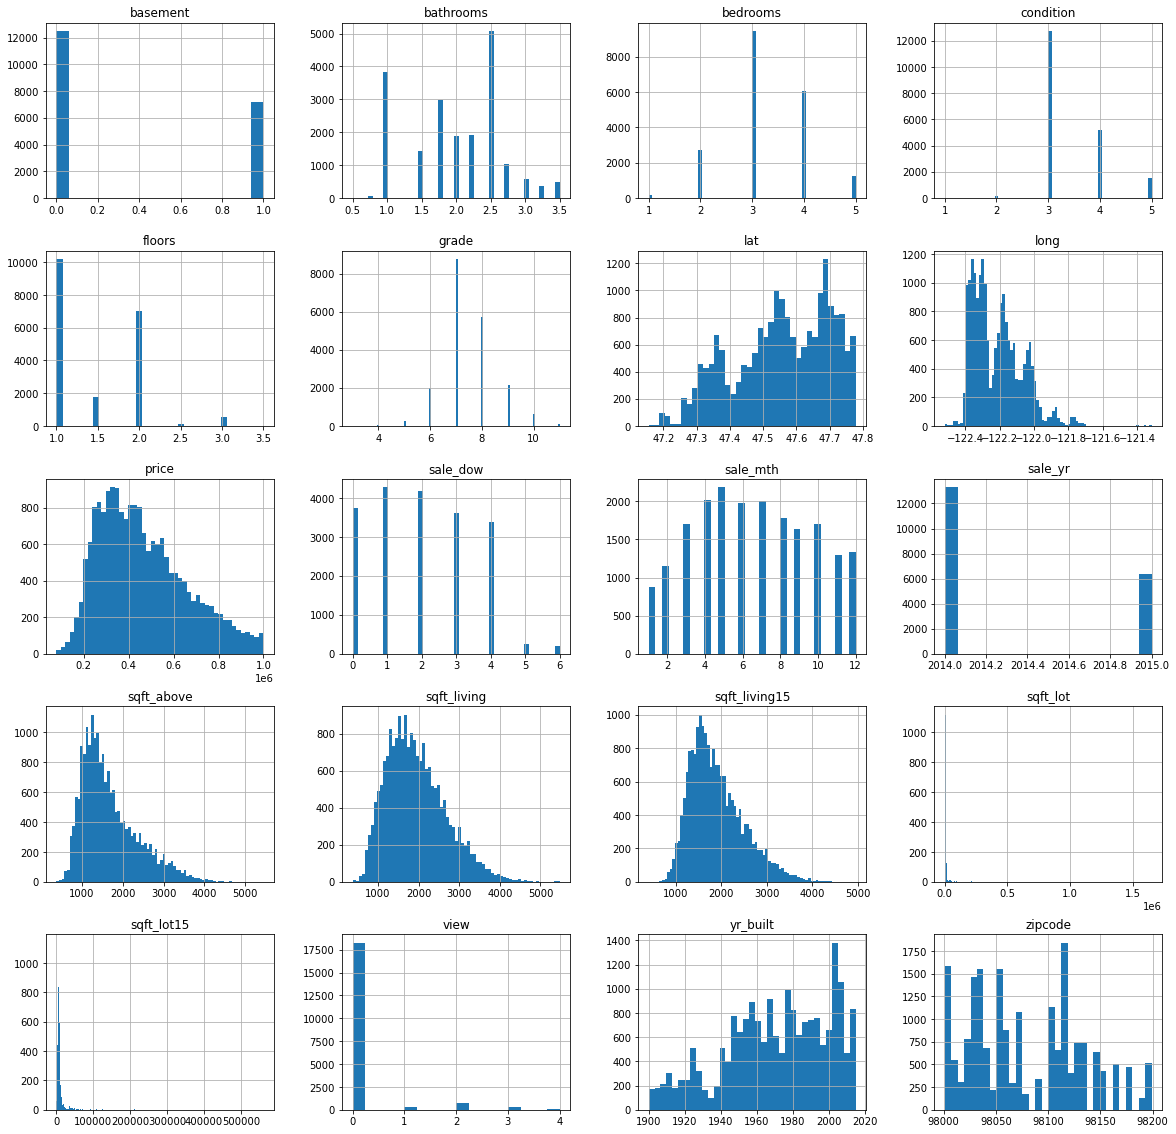

In [26]:
hists = df.hist(figsize = (20, 20), bins = 'auto') #Makes a histogram for each variable

Much better! Everything looks a little more normally distributed than before.

## Categorical vs. Continuous Data
From reviewing each histogram, we have a better idea of which variables are cateogircal and which are continuous.

#### Categorical Data
The following variables are categorical data:
* Basement(**basement**)
* Bathrooms (**bathrooms**)
* Bedrooms (**bedrooms**)
* Condition (**condition**)
* Floors (**floors**)
* Grade (**grade**)
* Sale Day of Week (**sale_dow**)
* Sale Month (**sale_mth**)
* Sale Year (**sale_yr**)
* View (**view**)
* Year Built (**yr_built**)
* Zipcode (**zipcode**)

#### Continuous Data
The following variables are continuous data:
* Latitude (**lat**)
* Longitude (**long**)
* Square Footage Above (**sqft_above**)
* Square Footage of Living Space (**sqft_living**)
* Square Footage of Living Space of 15 Closest Neighbors (**sqft_living15**)
* Square Footage of Lot (**sqft_lot**)
* Square Footage of Lot of 15 Closest Neighbors (**sqft_lot15**)

### Categorical Data
In the following cells, I plot the categorical variables on bar graphs to get a better idea of their spreads.

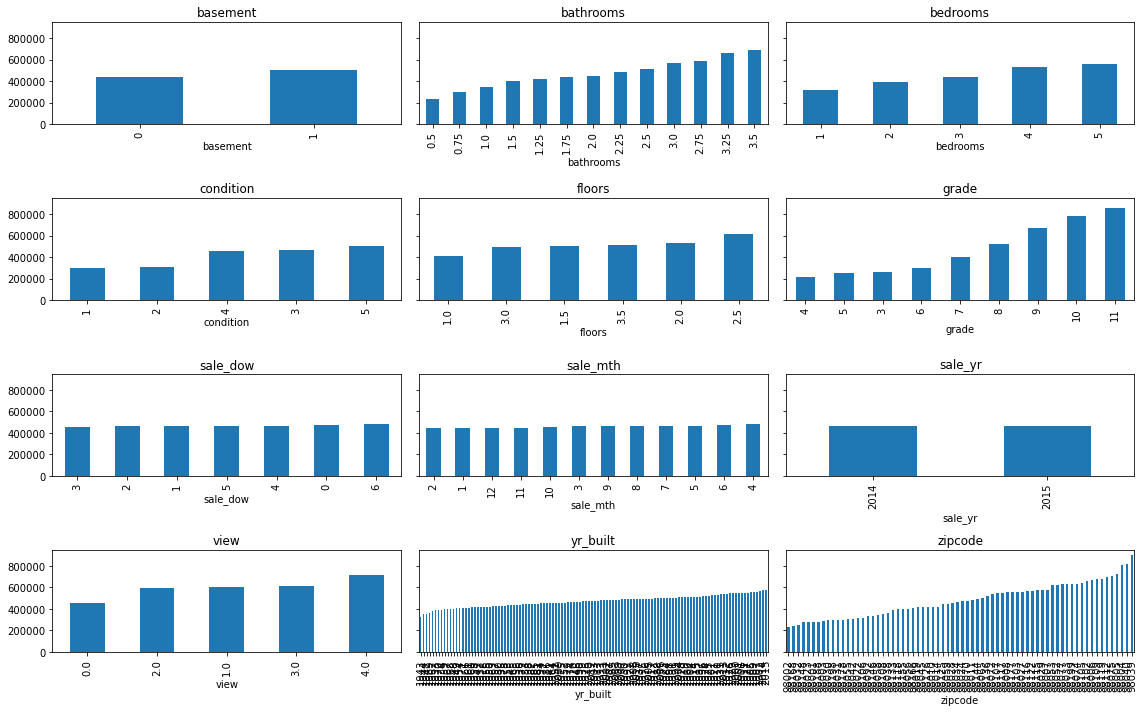

In [27]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (16, 10), sharey = True) #Creating figure
categoricals = ['basement', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'sale_dow', 'sale_mth', 
                'sale_yr', 'view', 'yr_built', 'zipcode'] #Defining categoricals with the columns

for col, ax in zip(categoricals, axes.flatten()): #for loop to create the graphs
    (df.groupby(col).mean()['price'].sort_values().plot.bar(ax = ax)) #Setting axes
    ax.set_title(col) #Setting title of each graph to the column name
fig.tight_layout() #Tightening layout so easier to view

We can now see the categorical variables organized by price. **Yr_built** and **zipcode** are hard to view because there are so many numbers but we can look further into that later, it is not necessary to fix those graphs at this point.

I want to review which categorical variables are ordinal, so I will use box plots to do this.

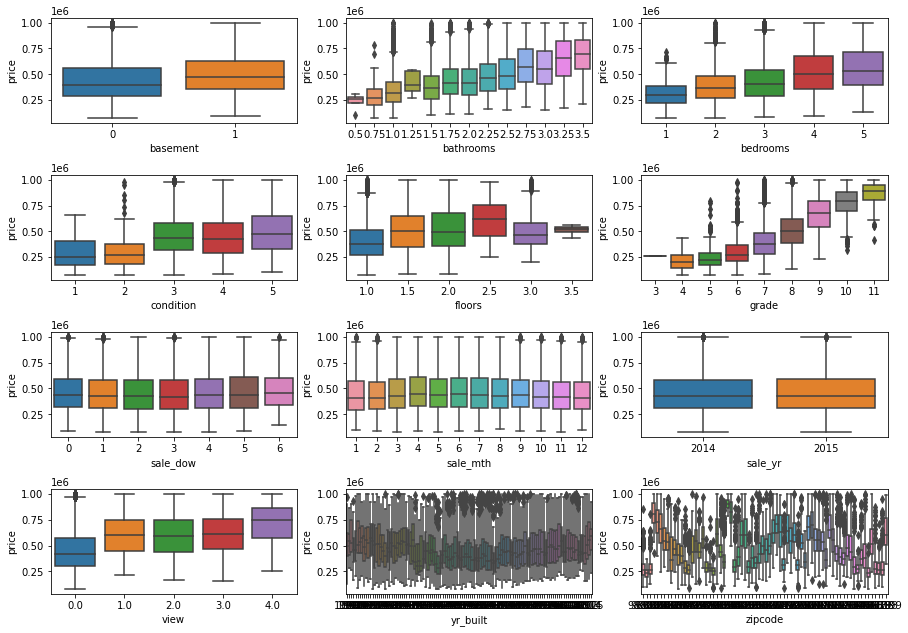

In [28]:
plt.figure(figsize = (15, 10)) #Setting size of figure
for i, c in enumerate(categoricals, 1): #Creating for loop to run through the variables
    plt.subplot(4, 3, i) #Creating subplots for each plot
    g = sns.boxplot(x = c, y = 'price', data = df) #Telling the plot what to read in
    plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.5) #Adjusting size
fig.tight_layout() #Tightening layout to fit screen
plt.show() #Shows plots

While some of these are very messy, it is easy to tell which categorical variables are ordinal.

The ordinal variables are:
* **bathrooms**
* **bedrooms**
* **condition**
* **grade**
* **view**

In addition, I am going to remove some variables from the dataframe because in the plots above it appears as though some have too many similar data points.

I am going to remove:
* **sale_dow**
* **sale_mth**
* **sale_yr**

I am also going to remove **zipcode** and **yr_built** because I will not be utilizing these further in my analysis.

Now let's see what happens with our data next.

In [29]:
del df['sale_dow'] #Deleting column from dataframe
del df['sale_mth'] #Deleting column from dataframe
del df['sale_yr'] #Deleting column from dataframe
del df['zipcode'] #Deleting column from dataframe
del df['yr_built'] #Deleting column from dataframe

## Check for Linearity
Next I will check for linearity of all the features with te target variable (price) using scatter plots.

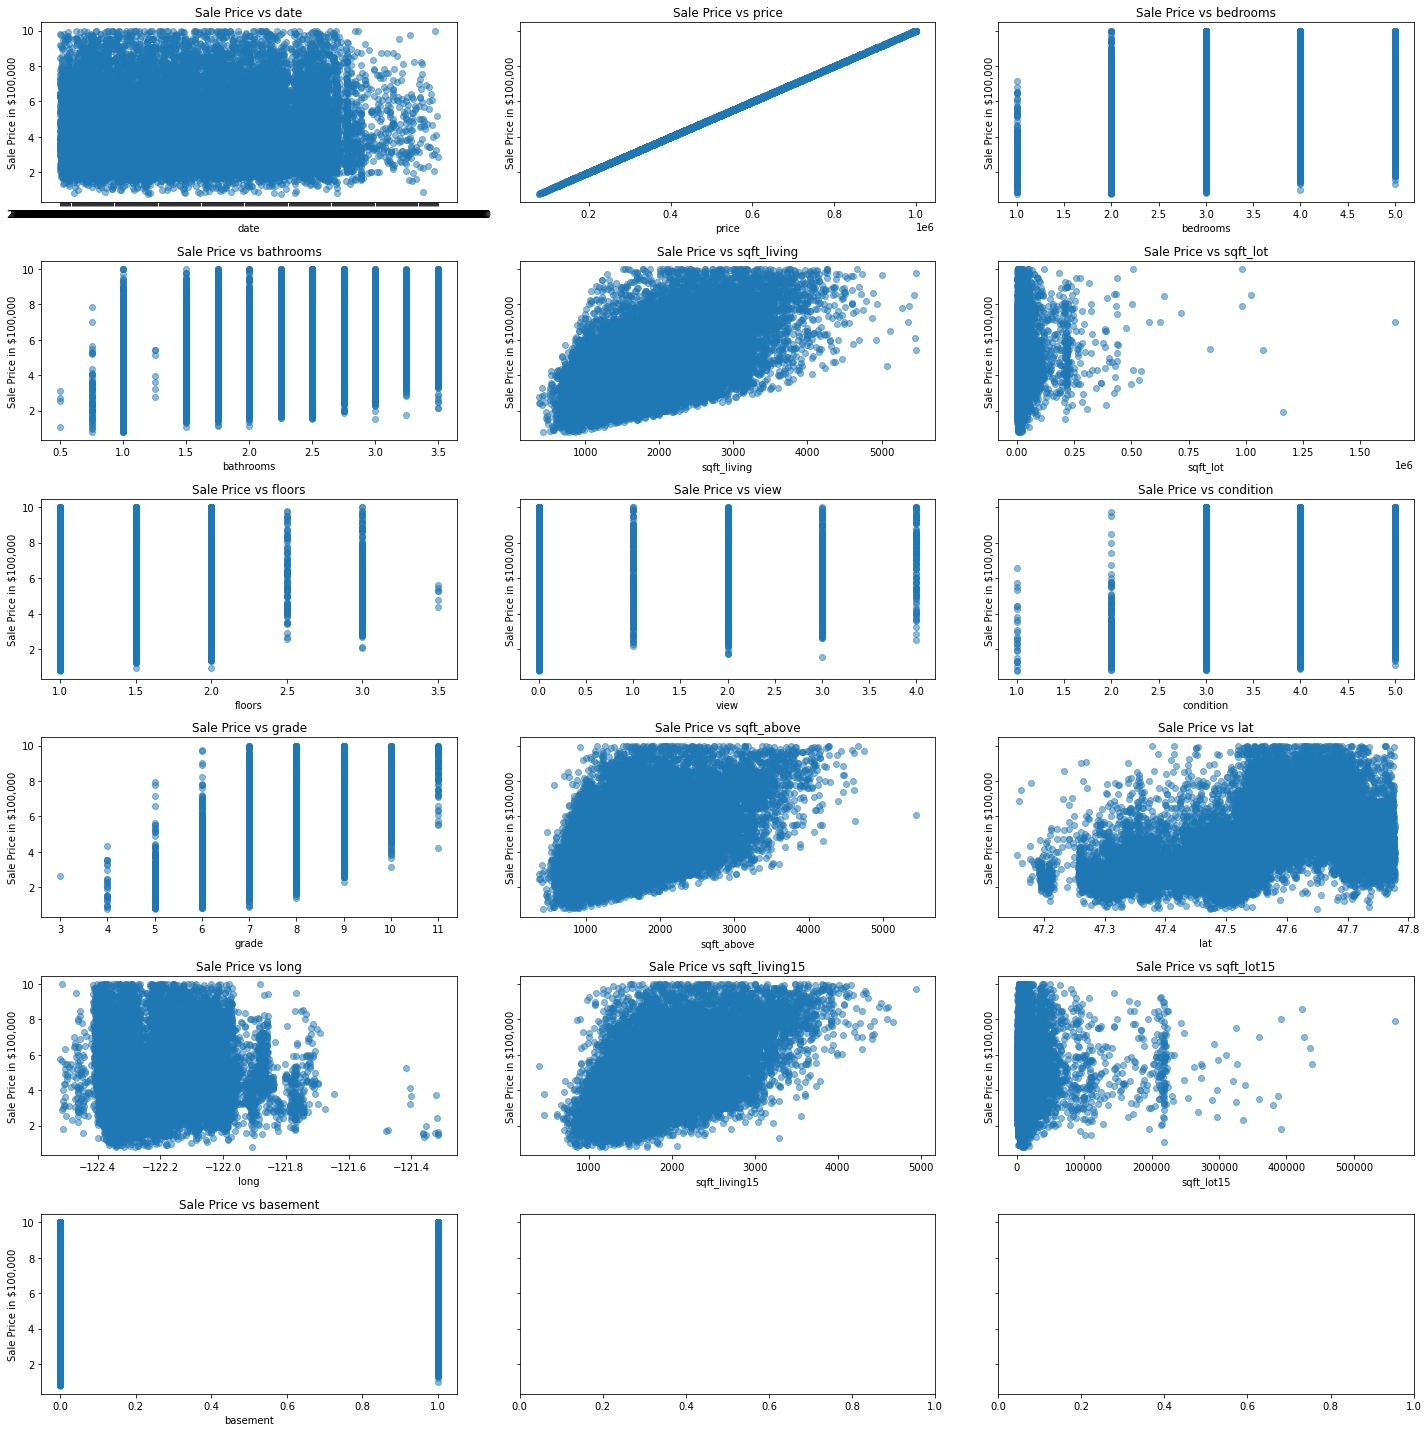

In [30]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 20), sharey = True) #Setting figure and axes
for ax, column in zip(axes.flatten(), df.columns): #Creating a for loop
    ax.scatter(df[column], df['price'] / 100_000, label = column, alpha = 0.5) #Setting scatter plots
    ax.set_title(f'Sale Price vs {column}') #Setting titles of plots
    ax.set_xlabel(column) #Setting x label
    ax.set_ylabel('Sale Price in $100,000') #Setting y label
fig.tight_layout() #Setting a tight layout

## Check for Multicollinearity
In the following cells, I check to make sure my potential predictors do not have overly high pairwise-correlation (r > .65).

In [31]:
corr = df.corr().abs() #Setting correlation
c = corr.unstack() #Setting c
co = c.sort_values(kind = 'quicksort') #Setting co
corr.head() #Print 5 rows of correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement
price,1.000000,0.286416,0.425255,0.597866,0.088860,0.263660,0.210383,0.037031,0.613189,0.506628,0.444812,0.075203,0.544839,0.077356,0.152449
bedrooms,0.286416,1.000000,0.486512,0.600126,0.024127,0.160990,0.024689,0.023871,0.343496,0.481116,0.050790,0.169170,0.404102,0.022816,0.130726
bathrooms,0.425255,0.486512,1.000000,0.695930,0.054938,0.511915,0.071213,0.140399,0.611266,0.618172,0.022387,0.262799,0.523773,0.056465,0.124894
sqft_living,0.597866,0.600126,0.695930,1.000000,0.149517,0.334080,0.142185,0.073166,0.695729,0.847398,0.001047,0.297329,0.739314,0.165411,0.165377
sqft_lot,0.088860,0.024127,0.054938,0.149517,1.000000,0.024441,0.083821,0.002067,0.083193,0.153152,0.097826,0.216817,0.140513,0.692919,0.036899


In [32]:
co.loc[co >= .65] #Checking which predictors have overly high pairwise-correlation

grade          sqft_living15    0.658189
sqft_living15  grade            0.658189
sqft_lot       sqft_lot15       0.692919
sqft_lot15     sqft_lot         0.692919
grade          sqft_living      0.695729
sqft_living    grade            0.695729
               bathrooms        0.695930
bathrooms      sqft_living      0.695930
grade          sqft_above       0.701052
sqft_above     grade            0.701052
               sqft_living15    0.716908
sqft_living15  sqft_above       0.716908
               sqft_living      0.739314
sqft_living    sqft_living15    0.739314
sqft_above     sqft_living      0.847398
sqft_living    sqft_above       0.847398
price          price            1.000000
condition      condition        1.000000
sqft_living15  sqft_living15    1.000000
long           long             1.000000
lat            lat              1.000000
sqft_above     sqft_above       1.000000
grade          grade            1.000000
view           view             1.000000
floors         f

We're seeing a lot of multicollinearity here, but especially from the sqft variables. I am going to remove all of those and run the previous cell's code again to see if that helps.

In [33]:
del df['sqft_above'] #Deleting column
del df['sqft_living'] #Deleting column
del df['sqft_living15'] #Deleting column
del df['sqft_lot'] #Deleting column
del df['sqft_lot15'] #Deleting column
del df['date'] #Deleting column

In [34]:
corr = df.corr().abs() #Setting corr
c = corr.unstack() #Setting c
co = c.sort_values(kind = 'quicksort') #Setting co
co.loc[co >= .65] #Checking to see which predictors have overly high pairwise-correlation

price      price        1.0
lat        lat          1.0
grade      grade        1.0
condition  condition    1.0
view       view         1.0
floors     floors       1.0
bathrooms  bathrooms    1.0
bedrooms   bedrooms     1.0
long       long         1.0
basement   basement     1.0
dtype: float64

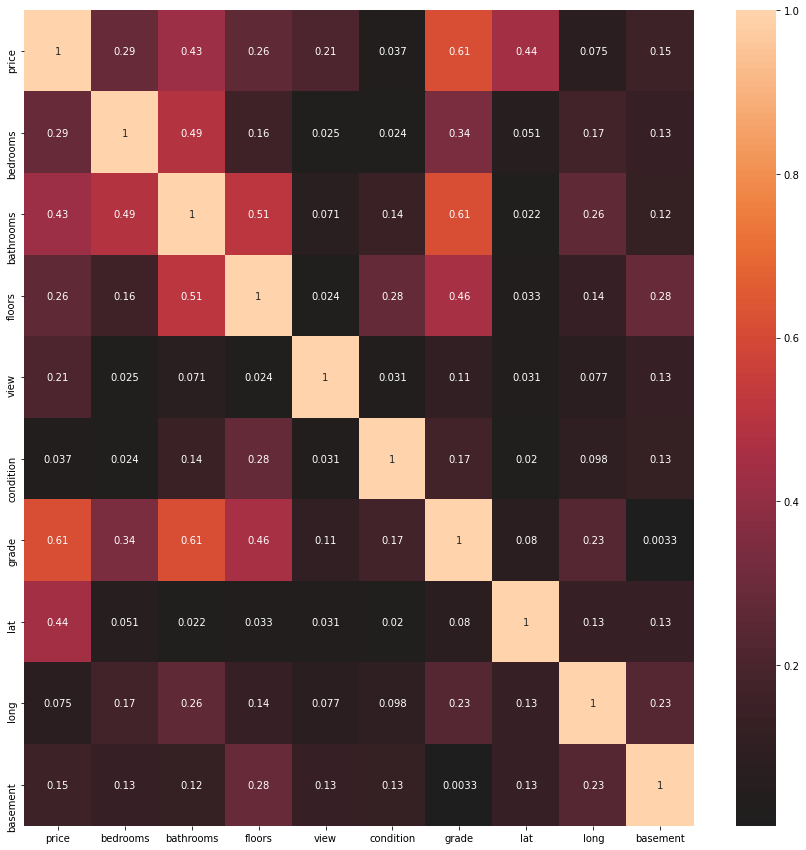

In [35]:
plt.figure(figsize = (15, 15)) #Adjusting size of plot
sns.heatmap(corr, center = 0, annot = True); #Visualizing correlation between predictors

Much better! By removing the sqft data points we have removed most of the multicollinearity. Next we'll be moving on to ask a few questions that can be answered through the EDA.

## Further Exploration
Through EDA, I am seeking to answer these questions:

* What features have the highest correlation with price?
* Does grade vary by location?
* Is the number of bathrooms or number of bedrooms more important?

In the following cells, I will answer each question individually.

### 1. What features have the highest correlation with price?

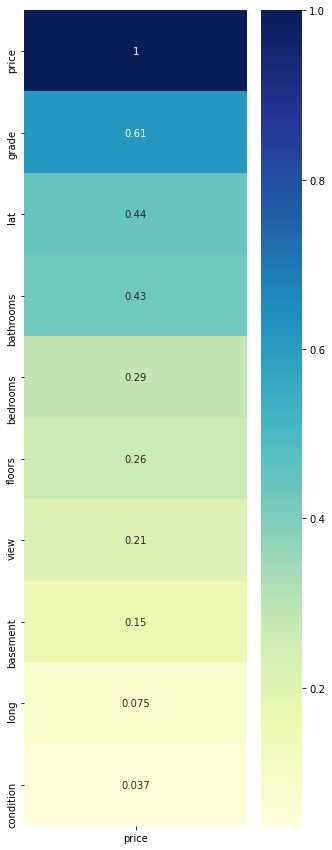

In [36]:
price_corr = pd.DataFrame(corr['price']) #Creating frame for price correlations
price_corr.sort_values('price', ascending = False, inplace = True) #Sorting from most to least

fig = plt.figure(figsize = (5, 15)) #Setting figure size
sns.heatmap(price_corr, annot = True, cmap="YlGnBu"); #Plotting heatmap

The features that have the highest correlations with **price** are **grade**, **lat**, and **bathrooms**. Now let's explore a model using only these 3 variables.

In [37]:
model_3withP = ols(formula = 'price ~ grade + lat + bathrooms', data = df).fit() #Setting model
model_3withP.summary() #Printing summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     7803.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:18:23   Log-Likelihood:            -2.5956e+05
No. Observations:               19659   AIC:                         5.191e+05
Df Residuals:                   19655   BIC:                         5.192e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.682e+07   3.15e+05    -85.166      0.000   -2.74e+07   -2.62e+07
grade       9.742e+04   1187.819     82.019      0.000    9.51e+04    9.98e+04
lat         5.569e+05   6636.811     83.914      0.000    5.44e+05     5.7e+05
bathrooms   3.697e+04   1780.595     20.762      0.000    3.35e+04    4.05e+04
==============================================================================
Omnibus:                     1769.116   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2443.431
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       3.894   Cond. No.                     1.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on this model, it appears as though **grade**, **lat**, and **bathrooms** can explain approximately 54% of our price data.

### 2. Does grade vary by location?

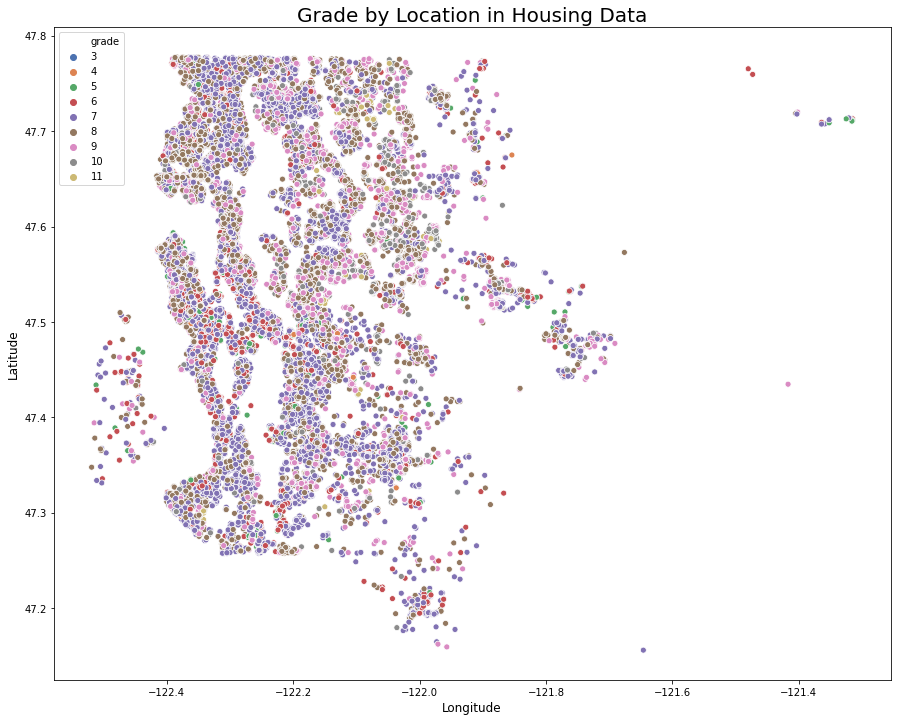

In [38]:
plt.figure(figsize = (15, 12)) #Setting fig size
sns.scatterplot(x = df['long'], y = df['lat'], hue = df['grade'], palette = 'deep') #Setting scatterplot rules
plt.title('Grade by Location in Housing Data', fontsize = 20) #Setting plot title
plt.legend() #Adding a legend to the plot
plt.xlabel('Longitude', fontsize = 12) #Setting x label
plt.ylabel('Latitude', fontsize = 12) #Setting y label
plt.show() #Show plot

We can see a very messy spread of house grades by location. It appears as though there are clusters of similarly graded houses throughout the map, and surrounding these clusters are other various graded houses.

### 3. Is the number of bathrooms or number of bedrooms more important?

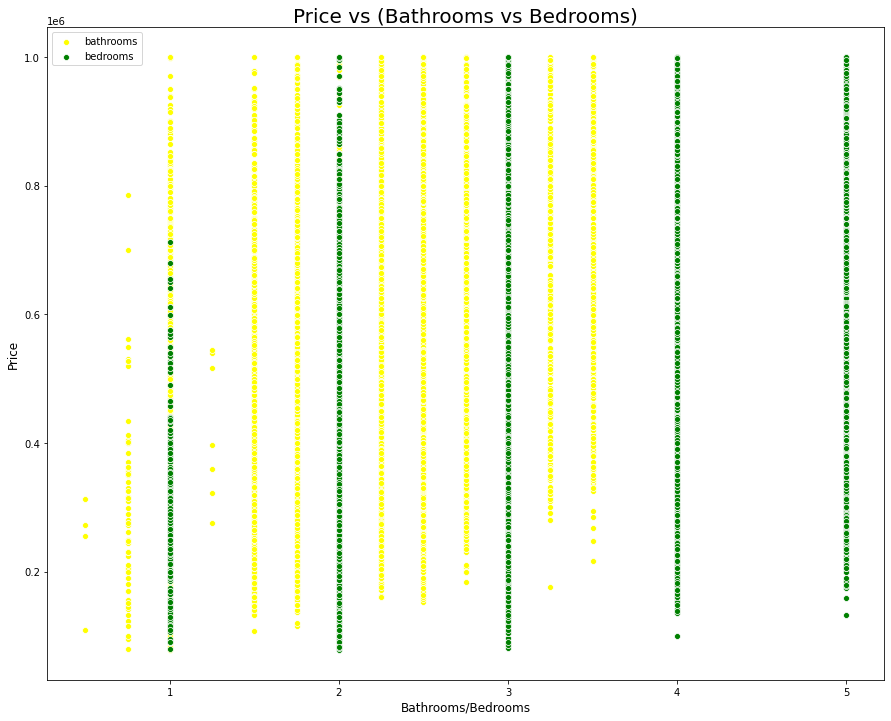

In [39]:
plt.figure(figsize = (15, 12)) #Setting figure size
sns.scatterplot(x = df['bathrooms'], y = df['price'], color = 'yellow', label = 'bathrooms') #Setting bathrooms
sns.scatterplot(x = df['bedrooms'], y = df['price'], color = 'green', label = 'bedrooms') #Setting bedrooms
plt.title('Price vs (Bathrooms vs Bedrooms)', fontsize = 20) #Setting title of plot
plt.legend() #Setting legend
plt.xlabel('Bathrooms/Bedrooms', fontsize = 12) #Setting x label
plt.ylabel('Price', fontsize = 12) #Setting y label
plt.show() #Show plot

It is difficult to tell exactly which is more important. Let's model both of these individually to double check.

In [40]:
model_bath = ols(formula = 'price ~ bathrooms', data = df).fit() #Creating model for bathrooms
model_bath.summary() #Looking at summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4340.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:18:25   Log-Likelihood:            -2.6531e+05
No. Observations:               19659   AIC:                         5.306e+05
Df Residuals:                   19657   BIC:                         5.306e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.15e+05   3982.868     53.979      0.000    2.07e+05    2.23e+05
bathrooms   1.238e+05   1880.049     65.875      0.000     1.2e+05    1.28e+05
==============================================================================
Omnibus:                     1055.536   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.215
Skew:                           0.609   Prob(JB):                    1.98e-267
Kurtosis:                       2.870   Cond. No.                         8.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model_bed = ols(formula = 'price ~ bedrooms', data = df).fit() #Creating model for bedrooms
model_bed.summary() #Looking at summary of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1757.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:18:25   Log-Likelihood:            -2.6643e+05
No. Observations:               19659   AIC:                         5.329e+05
Df Residuals:                   19657   BIC:                         5.329e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.398e+05   5513.211     43.487      0.000    2.29e+05    2.51e+05
bedrooms     6.85e+04   1634.480     41.912      0.000    6.53e+04    7.17e+04
==============================================================================
Omnibus:                     1047.158   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1175.692
Skew:                           0.583   Prob(JB):                    5.03e-256
Kurtosis:                       2.727   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can confirm that the number of bathrooms (18%) is more likely to affect the price of the house than the number of bedrooms (8.2%).

## One Hot Encoding and Dummy Variables
In the following cells I will finish up this EDA by pushing the categorical variables into dummies on a new dataframe so we have our final dataframe for modeling. Earlier in this notebook we set categoricals, since then we have removed columns so we'll start by resetting our categoricals.

In [42]:
categoricals = ['floors'] #Setting categoricals to be converted
df[categoricals] = df[categoricals].astype(str) #Changing to str
df.info() #Checking if changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 0 to 21533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      19659 non-null  float64
 1   bedrooms   19659 non-null  int64  
 2   bathrooms  19659 non-null  float64
 3   floors     19659 non-null  object 
 4   view       19659 non-null  float64
 5   condition  19659 non-null  int64  
 6   grade      19659 non-null  int64  
 7   lat        19659 non-null  float64
 8   long       19659 non-null  float64
 9   basement   19659 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 2.3+ MB


In [43]:
dummies = pd.get_dummies(df[categoricals], prefix = categoricals, drop_first = True) #Setting dummies
df_model = df.drop(categoricals, axis = 1) #Dropping
df_model = pd.concat([df_model, dummies], axis = 1) #Merging
df_model.head() #Printing first 5 rows of data

,price,bedrooms,bathrooms,view,condition,grade,lat,long,basement,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,0.0,3,7,47.5112,-122.257,0,0,0,0,0,0
1,538000.0,3,2.25,0.0,3,7,47.7210,-122.319,1,0,1,0,0,0
2,180000.0,2,1.00,0.0,3,6,47.7379,-122.233,0,0,0,0,0,0
3,604000.0,4,3.00,0.0,5,7,47.5208,-122.393,1,0,0,0,0,0
4,510000.0,3,2.00,0.0,3,8,47.6168,-122.045,0,0,0,0,0,0


In [44]:
df_model.columns #Reviewing columns

Index(['price', 'bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'lat',
       'long', 'basement', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5'],
      dtype='object')

In [45]:
df_model.to_csv('UpdatedEDA.csv') #Saving updated dataframe